In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BL-Flickr-Images-Book.csv')

df.describe()

,Identifier,Corporate Author,Corporate Contributors,Engraver
count,8.287000e+03,0.0,0.0,0.0
mean,2.017344e+06,NaN,NaN,NaN
std,1.190379e+06,NaN,NaN,NaN
min,2.060000e+02,NaN,NaN,NaN
25%,9.157875e+05,NaN,NaN,NaN
50%,2.043707e+06,NaN,NaN,NaN
75%,3.047430e+06,NaN,NaN,NaN
max,4.160339e+06,NaN,NaN,NaN


In [3]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [6]:
to_drop = ['Edition Statement', 
           'Corporate Author', 
           'Corporate Contributors', 
           'Former owner', 
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

In [7]:
df.drop(to_drop, inplace=True, axis=1)

In [8]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [ ]:
#df.drop(colums=to_drop, inplace=True)

In [9]:
df['Identifier'].is_unique

KeyError: 'Identifier'

In [10]:
df = df.set_index('Identifier')
df.head()

KeyError: "None of ['Identifier'] are in the columns"

In [11]:
df.loc[206]

Place of Publication                                               London
Date of Publication                                           1879 [1878]
Publisher                                                S. Tinsley & Co.
Title                                   Walter Forbes. [A novel.] By A. A
Author                                                              A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 206, dtype: object

In [ ]:
#df.set_index('Identifier', inplace=True)

In [12]:
df.dtypes.value_counts()

object    6
dtype: int64

In [13]:
df.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

In [ ]:
regex = r'^(\d{4})'

In [14]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extr.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

In [15]:
df['Date of Publication'] = pd.to_numeric(extr)
df['Date of Publication'].dtype

dtype('float64')

In [16]:
df['Date of Publication'].isnull().sum() / len(df)

0.11717147339205986

In [ ]:
#np.where(condition, then, else)

In [ ]:
#np.where(condition1, x1, 
        #np.where(condition2, x2, 
            #np.where(condition3, x3, ...)))

In [17]:
df['Place of Publication'].head(10)

Identifier
206                                  London
216                London; Virtue & Yorston
218                                  London
472                                  London
480                                  London
481                                  London
519                                  London
667     pp. 40. G. Bryan & Co: Oxford, 1898
874                                 London]
1143                                 London
Name: Place of Publication, dtype: object

In [18]:
df.loc[4157862]

Place of Publication                                  Newcastle-upon-Tyne
Date of Publication                                                1867.0
Publisher                                                      T. Fordyce
Title                   Local Records; or, Historical Register of rema...
Author                      FORDYCE, T. - Printer, of Newcastle-upon-Tyne
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4157862, dtype: object

In [19]:
df.loc[4159587]

Place of Publication                                  Newcastle upon Tyne
Date of Publication                                                1834.0
Publisher                                                Mackenzie & Dent
Title                   An historical, topographical and descriptive v...
Author                                              Mackenzie, E. (Eneas)
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4159587, dtype: object

In [20]:
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]

Identifier
206    True
216    True
218    True
472    True
480    True
Name: Place of Publication, dtype: bool

In [21]:
oxford = pub.str.contains('Oxford')

In [22]:
df['Place of Publication'] = np.where(london, 'London',
                                      np.where(oxford, 'Oxford',
                                               pub.str.replace('-', ' ')))
df['Place of Publication'].head()

Identifier
206    London
216    London
218    London
472    London
480    London
Name: Place of Publication, dtype: object

In [23]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [24]:
university_towns = []
with open("university_towns.txt") as file:
     for line in file:
         if '[edit]' in line:
             # Remember this `state` until the next is found
             state = line
         else:
             # Otherwise, we have a city; keep `state` as last-seen
             university_towns.append((state, line))

university_towns[:5]

[('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

In [25]:
towns_df = pd.DataFrame(university_towns,
                        columns=['State', 'RegionName'])

towns_df.head()

,State,RegionName
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


In [26]:
contoh_data = {0 : ['mock','python','real','numpy'],
               1 : ['Dataset','pandas','python','clean']}

contoh_dataframe = pd.DataFrame(contoh_data)

contoh_dataframe.head()

,0,1
0,mock,Dataset
1,python,pandas
2,real,python
3,numpy,clean


In [27]:
def get_citystate(item):
     if ' (' in item:
         return item[:item.find(' (')]
     elif '[' in item:
         return item[:item.find('[')]
     else:
         return item

In [28]:
towns_df =  towns_df.applymap(get_citystate)

In [29]:
towns_df.head()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


In [30]:
olympics_df = pd.read_csv("olympics.csv")
olympics_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [7]:
olympics_df = pd.read_csv("olympics.csv", header=1)
olympics_df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [10]:
new_names =  {'Unnamed: 0': 'Country',
               '? Summer': 'Summer Olympics',
               '01 !': 'Gold',
               '02 !': 'Silver',
               '03 !': 'Bronze',
               '? Winter': 'Winter Olympics',
               '01 !.1': 'Gold.1',
               '02 !.1': 'Silver.1',
               '03 !.1': 'Bronze.1',
               '? Games': '# Games',
               '01 !.2': 'Gold.2',
               '02 !.2': 'Silver.2',
               '03 !.2': 'Bronze.2'}

In [11]:
olympics_df.rename(columns=new_names, inplace=True)

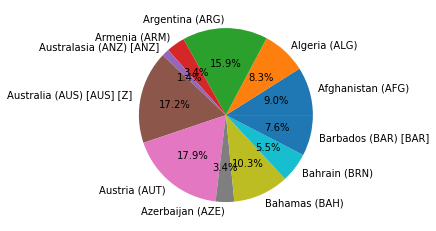

In [12]:
import matplotlib.pyplot as plt

olympics_df.head()

x=olympics_df['Country'].loc[0:10]
y=olympics_df['Summer Olympics'].loc[0:10]

plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()


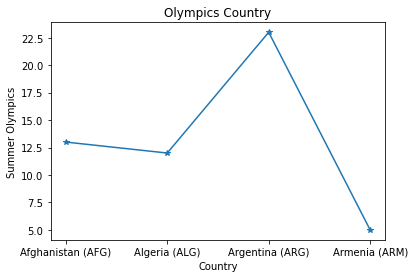

In [14]:
x=olympics_df['Country'].loc[0:]
y=olympics_df['Summer Olympics'].loc[0:3]
plt.plot( x, y, marker='*', ) 
plt.title('Olympics Country') 
plt.ylabel('Summer Olympics') 
plt.xlabel('Country') 
plt.show()